##Topic: Challenge Set 1
##Subject: Explore MTA Turnstile Data
##Date: January 13, 2018
##Name: Subramanian Iyer
##Worked With: Worked independently, with exception to Challenges 1 through 3, the solutions of which were provided in Class

#**Number 1**
 ##Solution was given in class; I have chosen to modify slightly.

In [86]:
import csv
from datetime import datetime
from collections import Counter
#Download a few MTA turnstile data files:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt

# Open up a file, use csv reader to read it:

with open('turnstile_170527.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
# Make a Python Dict; key is tuple, value is list of lists
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(row[4:])
#list(raw_readings.items())[0]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.6M    0 24.6M    0     0  4206k      0 --:--:--  0:00:06 --:--:-- 4245k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.5M    0 24.5M    0     0  2798k      0 --:--:--  0:00:09 --:--:-- 2359k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.4M    0 24.4M    0     0  2500k      0 --:--:--  0:00:10 --:--:-- 2144k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.4M    0 24.4M    0     0  1923k      0 --:--:--  0:00:13 --:--:-- 2089k


raw_readings is a solution to Challenge 1

#**Number 2**
 ##Solution was given in class; I have chosen to modify slightly.

In [87]:
# create a dict with the same keys, but the values being lists of just the point in time and the entries
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%H:%M:%S'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

for rows in datetime_cumulative.values():
    assert rows == sorted(rows)
datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                      # delta on entries
                                     rows[i+1][1] - rows[i][1],
                                     # delta on datetime
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

datetime_counts is a solution to Challenge 2.

#**Number 3**
 ##Solution was given in class.

In [88]:
#Create dict with same keys, but with values as total daily entries
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

day_counts is a solution to Challenge 3.

**Number 4**

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')


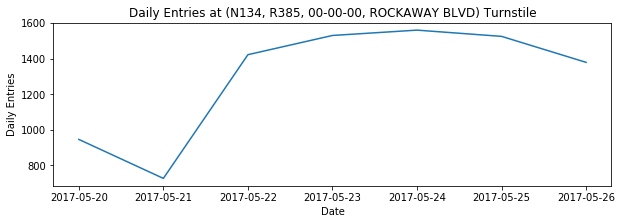

In [89]:
#Plot Daily Time Series for a Turnstile
%matplotlib inline
import matplotlib.pyplot as plt
stile = day_counts.keys()[0]
dates, counts = zip(*day_counts[stile])
print(stile)
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.ylabel('Daily Entries')
plt.xlabel('Date')
plt.title('Daily Entries at (N134, R385, 00-00-00, ROCKAWAY BLVD) Turnstile')

The generated plot is a solution to Challenge 4.

 **Number 5**

In [90]:
#Combine turnstiles up to unit granularity
from itertools import groupby
import numpy as np
dayCountsUnit = {}
for turnstile, entries in day_counts.items():
    key = [turnstile[0], turnstile[1], turnstile[3]]
    key = tuple(key)
    dayCountsUnit[key]= dayCountsUnit.get(key, []) + entries
    dayCountsUnit[key] = sorted(dayCountsUnit[key])
    dayCounts = []
    for day, group in groupby(dayCountsUnit[key], lambda x: x[0]):
        clist = [x[1] for x in group]
        dayCounts.append(tuple([day, int(np.sum(np.asarray(clist)))]))
    dayCountsUnit[key] = sorted(dayCounts)

dayCountsUnit is a solution to Challenge 5.

**Number 6**

In [91]:
#Combine units up to station granularity
dayCountsStation = {}
for unit, entries in dayCountsUnit.items():
    key = unit[2]
    dayCountsStation[key] = dayCountsStation.get(key, []) + entries
    dayCountsStation[key] = sorted(dayCountsStation[key])
    dayCounts = []
    for day, group in groupby(dayCountsStation[key], lambda x: x[0]):
        clist = [x[1] for x in group]
        dayCounts.append(tuple([day, int(np.sum(np.asarray(clist)))]))
    dayCountsStation[key] = sorted(dayCounts)

dayCountsStation is a solution to Challenge 6.

** Number 7**

CYPRESS AV
(2648, 1890, 4095, 4344, 4316, 4325, 3947)


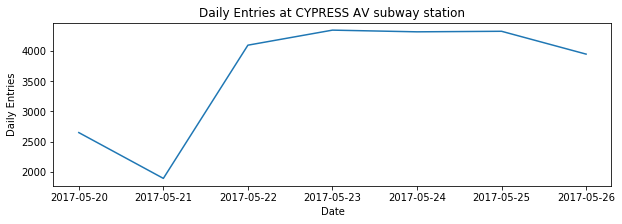

In [92]:
#Plot the time series for a station
station1 = dayCountsStation.keys()[0]
dates, counts = zip(*dayCountsStation[station1])
print(station1)
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.ylabel('Daily Entries')
plt.xlabel('Date')
plt.title('Daily Entries at CYPRESS AV subway station')
print(counts)

The generated plot is a solution to Challenge 7.

**Number 8**

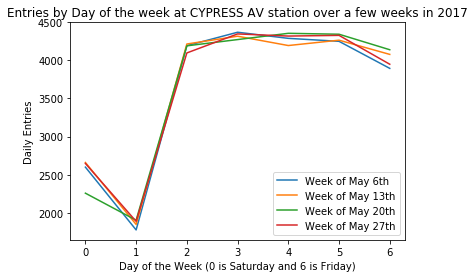

In [93]:
#1) Make one list of counts for one week for one station, then another, then another, then another.
pcounts =[]
turnstiles = ['turnstile_170506.txt', 'turnstile_170513.txt', 'turnstile_170520.txt', 'turnstile_170527.txt']
labs = ['Week of May 6th', 'Week of May 13th', 'Week of May 20th', 'Week of May 27th']
for j in range(4):
    with open(turnstiles[j]) as g:
        reader = csv.reader(g)
        rows = [[cell.strip() for cell in row] for row in reader]
    assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                           'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                           'EXITS']
    raw_readings = {}
    for row in rows:
        raw_readings.setdefault(tuple(row[:4]), []).append(row[4:])
    datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                          '%m/%d/%Y%H:%M:%S'),
                                        int(in_cumulative))
                                       for _, _, date, time,
                                           _, in_cumulative, _ in rows]
                           for turnstile, rows in raw_readings.items()}

    for rows in datetime_cumulative.values():
        rows = sorted(rows)
    datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                          # delta on entries
                                         rows[i+1][1] - rows[i][1],
                                         # delta on datetime
                                         rows[i+1][0] - rows[i][0]]
                                        for i in range(len(rows) - 1)]
                            for turnstile, rows in datetime_cumulative.items()}

    datetime_counts = {turnstile: [(time, count)
                                   for (time, count, _) in rows
                                   if 0 <= count <= 5000]
                       for turnstile, rows in datetime_count_times.items()}

    day_counts = {}
    for turnstile, rows in datetime_counts.items():
        by_day = {}
        for time, count in rows:
            day = time.date()
            by_day[day] = by_day.get(day, 0) + count
        day_counts[turnstile] = sorted(by_day.items())

    dayCountsUnit = {}
    for turnstile, entries in day_counts.items():
        key = [turnstile[0], turnstile[1], turnstile[3]]
        key = tuple(key)
        dayCountsUnit[key]= dayCountsUnit.get(key, []) + entries
        dayCountsUnit[key] = sorted(dayCountsUnit[key])
        dayCounts = []
        for day, group in groupby(dayCountsUnit[key], lambda x: x[0]):
            clist = [x[1] for x in group]
            dayCounts.append(tuple([day, int(np.sum(np.asarray(clist)))]))
        dayCountsUnit[key] = sorted(dayCounts)
    
    dayCountsStation = {}
    for unit, entries in dayCountsUnit.items():
        key = unit[2]
        dayCountsStation[key] = dayCountsStation.get(key, []) + entries
        dayCountsStation[key] = sorted(dayCountsStation[key])
        dayCounts = []
        for day, group in groupby(dayCountsStation[key], lambda x: x[0]):
            clist = [x[1] for x in group]
            dayCounts.append(tuple([day, int(np.sum(np.asarray(clist)))]))
        dayCountsStation[key] = sorted(dayCounts)
    dates, counts = zip(*dayCountsStation[station1])
    pcounts.append(counts[:])
#2) Plot Each List
for i in range(len(pcounts)):
    plt.plot(pcounts[i], label = labs[i])
plt.ylabel('Daily Entries')
plt.xlabel('Day of the Week (0 is Saturday and 6 is Friday)')
plt.title('Entries by Day of the week at CYPRESS AV station over a few weeks in 2017')
plt.legend()

The generated plot is a solution to Challenge 8.

**Number 9**

In [94]:
#1) sum total ridership over each station over several weeks
stationRidership = {}
turnstiles = ['turnstile_170506.txt', 'turnstile_170513.txt', 'turnstile_170520.txt', 'turnstile_170527.txt']
for j in range(4):
    with open(turnstiles[j]) as g:
        reader = csv.reader(g)
        rows = [[cell.strip() for cell in row] for row in reader]
    assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                           'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                           'EXITS']
    raw_readings = {}
    for row in rows:
        raw_readings.setdefault(tuple(row[:4]), []).append(row[4:])
    datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                          '%m/%d/%Y%H:%M:%S'),
                                        int(in_cumulative))
                                       for _, _, date, time,
                                           _, in_cumulative, _ in rows]
                           for turnstile, rows in raw_readings.items()}

    for rows in datetime_cumulative.values():
        rows = sorted(rows)
    datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                          # delta on entries
                                         rows[i+1][1] - rows[i][1],
                                         # delta on datetime
                                         rows[i+1][0] - rows[i][0]]
                                        for i in range(len(rows) - 1)]
                            for turnstile, rows in datetime_cumulative.items()}

    datetime_counts = {turnstile: [(time, count)
                                   for (time, count, _) in rows
                                   if 0 <= count <= 5000]
                       for turnstile, rows in datetime_count_times.items()}

    day_counts = {}
    for turnstile, rows in datetime_counts.items():
        by_day = {}
        for time, count in rows:
            day = time.date()
            by_day[day] = by_day.get(day, 0) + count
        day_counts[turnstile] = sorted(by_day.items())

    dayCountsUnit = {}
    for turnstile, entries in day_counts.items():
        key = [turnstile[0], turnstile[1], turnstile[3]]
        key = tuple(key)
        dayCountsUnit[key]= dayCountsUnit.get(key, []) + entries
        dayCountsUnit[key] = sorted(dayCountsUnit[key])
        dayCounts = []
        for day, group in groupby(dayCountsUnit[key], lambda x: x[0]):
            clist = [x[1] for x in group]
            dayCounts.append(tuple([day, int(np.sum(np.asarray(clist)))]))
        dayCountsUnit[key] = sorted(dayCounts)
    
    dayCountsStation = {}
    for unit, entries in dayCountsUnit.items():
        key = unit[2]
        dayCountsStation[key] = dayCountsStation.get(key, []) + entries
        dayCountsStation[key] = sorted(dayCountsStation[key])
        dayCounts = []
        for day, group in groupby(dayCountsStation[key], lambda x: x[0]):
            clist = [x[1] for x in group]
            dayCounts.append(tuple([day, int(np.sum(np.asarray(clist)))]))
        dayCountsStation[key] = sorted(dayCounts)
        cumulator = [x[1] for x in dayCounts]
        stationRidership[key] = stationRidership.get(key, 0) + np.sum(np.asarray(cumulator))
srTd = [x for x in sorted(stationRidership.items(), key = lambda x: x[1], reverse = True)]
print srTd[0:10]
    

[('34 ST-PENN STA', 25919463), ('23 ST', 19459676), ('FULTON ST', 16633879), ('GRD CNTRL-42 ST', 11398544), ('86 ST', 9885436), ('34 ST-HERALD SQ', 8954312), ('TIMES SQ-42 ST', 8921640), ('14 ST-UNION SQ', 8643304), ('42 ST-PORT AUTH', 7161987), ('14 ST', 7127951)]


srTd is a solution to Challenge 9.

**Number 10**

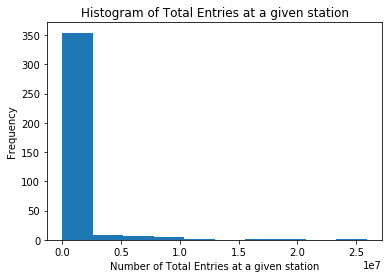

In [96]:
#Make a single list of the ridership values and plot it with a histogram
ridershipVals = [x[1] for x in srTd]
plt.hist(ridershipVals)
plt.xlabel('Number of Total Entries at a given station')
plt.ylabel('Frequency')
plt.title('Histogram of Total Entries at a given station')

ridershipVals and the generated plot together comprise a solution to Challenge 10.

**Additional Hint**

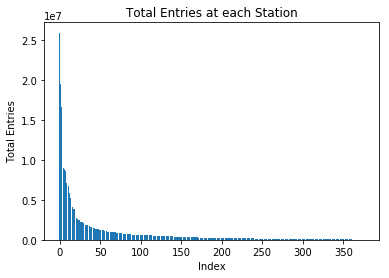

In [97]:
#Sort total ridership counts and make a bar graph 
indices = range(len(srTd))
plt.bar(indices, ridershipVals)
plt.title('Total Entries at each Station')
plt.ylabel('Total Entries')
plt.xlabel('Index')

The generted plot was inspired by the additional hint.